# *Classification of Case Disposition: Predicting Conviction or Acquittal*
*We employ a classification methodology to categorize a specific subset of our dataset into two distinct groups. Our objective is to determine whether a given test case would result in a disposition of conviction or acquittal.*

## *Features Used for Classification*
1. State Code: The code representing the state where the case is being heard.
2. District Code: The code indicating the specific district within the state where the case is being heard.
3. Court Number: The number identifying the court where the case is being heard.
4. Judge Position: The position or rank of the judge presiding over the case.
5. Defendant's Gender: The gender of the defendant involved in the case.
6. Gender of Defendant's Advocate: The gender of the lawyer representing the defendant.
7. Gender of Petitioner's Advocate: The gender of the lawyer or advocate representing the petitioner.
8. Case Type: The type or category of the case (e.g., criminal, civil, family law).
9. Case Purpose: The intended purpose or objective of the case.
10. Case Completion Time: The duration it takes for a case to reach its completion.
11. Judge's Gender: The gender of the judge presiding over the case.
12. Judge's Experience: The level of experience or tenure of the judge in adjudicating criminal cases.

## *Model Used for Classification*
*The random forest classification model is chosen due to its distinct advantages over other models. By incorporating randomness and independence in the model, it offers several benefits. Random forests excel at handling high-dimensional data and are less prone to overfitting compared to other models.*

In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/notebook3efbecc3b4/__results__.html
/kaggle/input/notebook3efbecc3b4/__notebook__.ipynb
/kaggle/input/notebook3efbecc3b4/cases_convicted_acquitted.csv
/kaggle/input/notebook3efbecc3b4/__output__.json
/kaggle/input/notebook3efbecc3b4/custom.css
/kaggle/input/court-data/judges_clean/judges_clean.csv
/kaggle/input/court-data/acts_sections/acts_sections.csv
/kaggle/input/court-data/cases/cases/cases_2015.csv
/kaggle/input/court-data/cases/cases/cases_2012.csv
/kaggle/input/court-data/cases/cases/cases_2018.csv
/kaggle/input/court-data/cases/cases/cases_2013.csv
/kaggle/input/court-data/cases/cases/cases_2017.csv
/kaggle/input/court-data/cases/cases/cases_2010.csv
/kaggle/input/court-data/cases/cases/cases_2014.csv
/kaggle/input/court-data/cases/cases/cases_2016.csv
/kaggle/input/court-data/cases/cases/cases_2011.csv
/kaggle/input/court-data/keys/keys/type_name_key.csv
/kaggle/input/court-data/keys/keys/cases_district_key.csv
/kaggle/input/court-data/keys/keys/act_key.csv
/kag

## *Libraries*

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [4]:
from sklearn.preprocessing import OneHotEncoder  
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

## *Data*
Importing the pre-processed data file into the notebook

In [5]:
case_disp = pd.read_csv("/kaggle/input/notebook3efbecc3b4/cases_convicted_acquitted.csv")
case_disp

,ddl_case_id,state_code,dist_code,court_no,judge_position,female_defendant,female_adv_def,female_adv_pet,type_name,purpose_name,case_duration,female_judge,judge_experience,disp_name_s
0,01-01-01-203008000082010,1,1,1,chief judicial magistrate,0,0,0,4018.0,3280.0,1827.0,0,326,1
1,01-01-01-203008000402010,1,1,1,chief judicial magistrate,0,1,0,4018.0,3280.0,1850.0,0,379,1
2,01-01-01-203008000472010,1,1,1,chief judicial magistrate,0,0,0,4018.0,3280.0,1849.0,0,228,0
3,01-01-01-203008000892010,1,1,1,chief judicial magistrate,0,0,0,4018.0,3006.0,1873.0,0,458,0
4,01-01-01-203008000992010,1,1,1,chief judicial magistrate,0,0,0,4018.0,509.0,1330.0,0,39,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20914,29-08-17-202100002432015,29,8,17,additional jmfc,0,0,0,956.0,3258.0,1055.0,0,586,1
20915,29-10-01-202100000022015,29,10,1,district and sessions court,0,0,0,956.0,5446.0,1122.0,1,426,1
20916,29-10-01-203400000572015,29,10,1,district and sessions court,0,0,0,6043.0,5446.0,699.0,1,17,1
20917,29-10-01-203400000922015,29,10,1,district and sessions court,0,0,0,6043.0,5446.0,690.0,1,48,1


df["disp_name_s"] == 1 ("convicted")


df["disp_name_s"] == 0 ("acquitted")

## *Training*

*To train a Random Forest model when you have both categorical and numerical (continuous-valued) columns, you need to preprocess the data to handle the different types of features appropriately.*

In [6]:
categorical_columns = ['state_code', 'dist_code', 'court_no', 'judge_position',
       'female_defendant','female_adv_def', 'female_adv_pet', 'type_name', 
        'purpose_name','female_judge']

# Preprocessing for categorical features
categorical_transformer = Pipeline(steps=[
    ('encoder', OneHotEncoder(handle_unknown ='ignore'))  # One-hot encode the categorical columns
])

numerical_columns = ['case_duration', 'judge_experience']

# Preprocessing for numerical features
numerical_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())  # Standardize the numerical columns
])

# Applying the transformers to the appropriate columns in the dataset
preprocessor = ColumnTransformer(transformers=[
    ('cat', categorical_transformer, categorical_columns),
    ('num', numerical_transformer, numerical_columns)
])

*The `OneHotEncoder` is used to one-hot encode the categorical columns, while the `StandardScaler` is used to standardize the numerical columns. These preprocessing steps are then combined using a `ColumnTransformer` to apply them to the appropriate columns in the dataset.*

*We create a pipeline, `classifier`, that includes the `preprocessor` and the `RandomForest` classifier.*

In [7]:
classifier = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(n_estimators=300, max_depth=4, random_state=101, class_weight = 'balanced_subsample'))  # Set the appropriate parameters for the RandomForestClassifier
])

In [8]:
X = case_disp[['state_code', 'dist_code', 'court_no', 'judge_position',
       'female_defendant', 'female_adv_def', 'female_adv_pet', 'type_name',
       'purpose_name', 'case_duration', 'female_judge', 'judge_experience',]]

y = case_disp['disp_name_s']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

In [9]:
classifier.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat',
                                                  Pipeline(steps=[('encoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['state_code', 'dist_code',
                                                   'court_no', 'judge_position',
                                                   'female_defendant',
                                                   'female_adv_def',
                                                   'female_adv_pet',
                                                   'type_name', 'purpose_name',
                                                   'female_judge']),
                                                 ('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['case_duration',
                                                   'judge_experience'])])),
                ('classifier',
                 RandomForestClassifier(class_weight='balanced_subsample',
                                        max_depth=4, n_estimators=300,
                                        random_state=101))])

## *Performance Metrics*

#### *Score*

In [10]:
print(classifier.score(X_test, y_test)*100)

85.348948374761


#### *Making predictions on the testing set*

In [11]:

y_pred = classifier.predict(X_test)

#### *Classification Report*

In [12]:
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.77      0.86      0.81      1544
           1       0.91      0.85      0.88      2640

    accuracy                           0.85      4184
   macro avg       0.84      0.85      0.85      4184
weighted avg       0.86      0.85      0.85      4184



#### *Confusion Matrix*

In [13]:
print(confusion_matrix(y_test, y_pred))

[[1327  217]
 [ 396 2244]]


## *Tuning the parameters of the `RandomForestClassifier`*
*We use `GridSearchCV` from scikit-learn to perform a grid search over the specified parameter grid. The `param_grid` dictionary contains different values to try for each parameter. The `cv` parameter in GridSearchCV specifies the number of cross-validation folds to use during the search.*

In [14]:
# Defining the parameter grid to search over
param_grid = {
    'classifier__n_estimators': [300, 400, 500, 600], 
    'classifier__max_depth': [4, 5, 6],     
}

In [15]:
classifier = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(n_estimators=300, max_depth=4, random_state=101, class_weight = 'balanced_subsample'))  # Set the appropriate parameters for the RandomForestClassifier
])

# Performing grid search using cross-validation
grid_search = GridSearchCV(classifier, param_grid, cv=3, scoring='accuracy', verbose=3)

In [16]:
grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 12 candidates, totalling 36 fits
[CV 1/3] END classifier__max_depth=4, classifier__n_estimators=300;, score=0.871 total time=   3.0s
[CV 2/3] END classifier__max_depth=4, classifier__n_estimators=300;, score=0.859 total time=   3.0s
[CV 3/3] END classifier__max_depth=4, classifier__n_estimators=300;, score=0.884 total time=   3.2s
[CV 1/3] END classifier__max_depth=4, classifier__n_estimators=400;, score=0.877 total time=   4.0s
[CV 2/3] END classifier__max_depth=4, classifier__n_estimators=400;, score=0.875 total time=   4.1s
[CV 3/3] END classifier__max_depth=4, classifier__n_estimators=400;, score=0.884 total time=   4.0s
[CV 1/3] END classifier__max_depth=4, classifier__n_estimators=500;, score=0.869 total time=   4.9s
[CV 2/3] END classifier__max_depth=4, classifier__n_estimators=500;, score=0.868 total time=   5.0s
[CV 3/3] END classifier__max_depth=4, classifier__n_estimators=500;, score=0.886 total time=   5.0s
[CV 1/3] END classifier__max_depth=4, c

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('cat',
                                                                         Pipeline(steps=[('encoder',
                                                                                          OneHotEncoder(handle_unknown='ignore'))]),
                                                                         ['state_code',
                                                                          'dist_code',
                                                                          'court_no',
                                                                          'judge_position',
                                                                          'female_defendant',
                                                                          'female_adv_def',
                                                                          'female_adv_pet',
                                                                          'type_name',
                                                                          'purpose_name',
                                                                          'female_judge']),
                                                                        ('num',
                                                                         Pipeline(steps=[('scaler',
                                                                                          StandardScaler())]),
                                                                         ['case_duration',
                                                                          'judge_experience'])])),
                                       ('classifier',
                                        RandomForestClassifier(class_weight='balanced_subsample',
                                                               max_depth=4,
                                                               n_estimators=300,
                                                               random_state=101))]),
             param_grid={'classifier__max_depth': [4, 5, 6],
                         'classifier__n_estimators': [300, 400, 500, 600]},
             scoring='accuracy', verbose=3)

In [17]:
print("Best Parameters:", grid_search.best_params_)

Best Parameters: {'classifier__max_depth': 6, 'classifier__n_estimators': 300}


### *Using the best model for prediction*

In [18]:
best_classifier = grid_search.best_estimator_
y_pred = best_classifier.predict(X_test)

## *Performance Metrics*

#### *Score*

In [19]:
print(best_classifier.score(X_test, y_test)*100)

87.9302103250478


#### *Classification Report*

In [20]:
report = classification_report(y_test, y_pred, zero_division=0)
print(report)

              precision    recall  f1-score   support

           0       0.80      0.90      0.85      1544
           1       0.94      0.87      0.90      2640

    accuracy                           0.88      4184
   macro avg       0.87      0.88      0.87      4184
weighted avg       0.89      0.88      0.88      4184



#### *Confusion Matrix*

In [21]:
print(confusion_matrix(y_test, y_pred))

[[1395  149]
 [ 356 2284]]


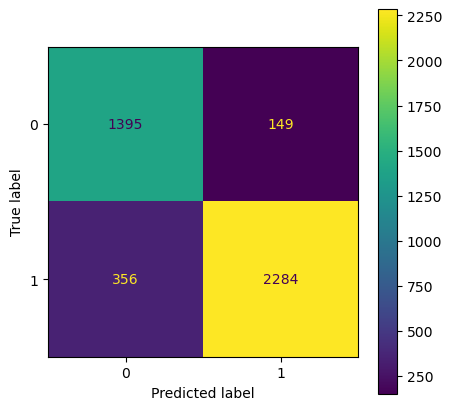

In [22]:
fig, axs = plt.subplots(figsize=(5,5))
display = ConfusionMatrixDisplay.from_predictions(y_test, y_pred, ax=axs)

plt.savefig('confusion_matrix.png')

#### *Our model demonstrates a commendable accuracy score of 85% in classifying case disposition. Notably, we were able to achieve a further improvement in accuracy to 88% by modifying the parameters used in the model. However, it is worth noting that the model's performance can be enhanced even further by increasing the amount of test data available for evaluation. Expanding the test dataset would likely lead to more comprehensive and robust model training, resulting in higher accuracy scores.*